In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

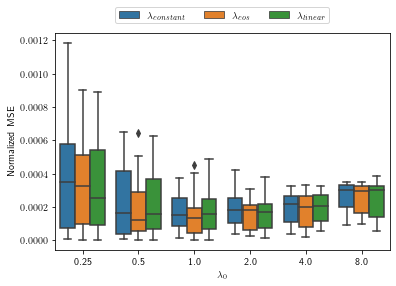

In [2]:
path = './images/'
plt.rcParams["text.usetex"] = True
df = pd.read_csv("./experiment_02.csv")


norm = (
    df.groupby(by=["codebook_size", "in_features"])["best/MSELoss"]
    .transform(lambda x: x - x.min())
    .rename("Normalized MSE")
)


dft = df.rename(
    columns={"influence": r"$\lambda_0$", "influence_decay": r"Decay Strategy"}
)

dft["Decay Strategy"] = dft["Decay Strategy"].map(
    {
        "cos": r"$\lambda_{cos}$",
        "linear": r"$\lambda_{linear}$",
        "constant": r"$\lambda_{constant}$",
    }
)

_, axis = plt.subplots()

sns.boxplot(ax=axis,
    x=dft[r"$\lambda_0$"],
    y=norm,
    hue=dft[r"Decay Strategy"],
)

axis.legend(
            bbox_to_anchor=(0.18, 1.12), loc="upper left", borderaxespad=0, ncol=4
        )

#plt.ylim([plt.ylim()[0], plt.ylim()[1]*1.2])
plt.savefig(path + "Normalized_mse_Influence_CIFAR.pdf", bbox_inches="tight")
plt.show()


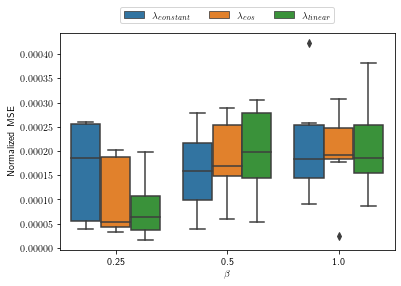

In [3]:
mask = dft[r"$\lambda_0$"] == 2.0
_, axis = plt.subplots()

sns.boxplot(ax=axis,x=dft["beta"][mask].rename(r'$\beta$'), y=norm[mask], hue=dft[r"Decay Strategy"][mask])
#plt.ylim([plt.ylim()[0], 0.002])
axis.legend(
            bbox_to_anchor=(0.18, 1.12), loc="upper left", borderaxespad=0, ncol=4
        )
plt.savefig(path + "CIFAR_beta_init_mse_loss.pdf", bbox_inches="tight")
plt.show()


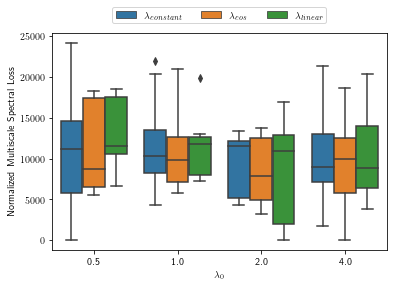

In [4]:

df = pd.read_csv("./experiment_01.csv")


norm = (
    df.groupby(by=["codebook_size",  "in_features"])["best/MultiscaleSpectralLossL1"]
    .transform(lambda x: x - x.min())
    .rename("Normalized Multiscale Spectral Loss")
)

dft = df.rename(
    columns={"influence": "$\lambda_0$", "influence_decay": "Decay Strategy"}
)

dft["Decay Strategy"] = dft["Decay Strategy"].map(
    {
        "cos": "$\lambda_{cos}$",
        "linear": "$\lambda_{linear}$",
        "constant": "$\lambda_{constant}$",
    }
)

_, axis = plt.subplots()
sns.boxplot(ax=axis,
    x=dft["$\lambda_0$"],
    y=norm,
    hue=dft["Decay Strategy"],
)

axis.legend(
            bbox_to_anchor=(0.18, 1.12), loc="upper left", borderaxespad=0, ncol=4
        )
plt.savefig(path + "Normalized_Loss_Influence_Speechcommands.pdf", bbox_inches="tight")
plt.show()


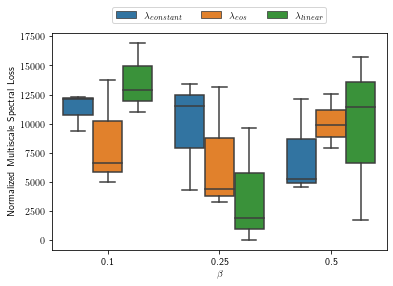

In [5]:

# Evaluate useful beta after selecting initial influence to be 1.0
mask = dft["$\lambda_0$"] == 2.0
_, axis = plt.subplots()
sns.boxplot(ax=axis,x=dft["beta"][mask].rename("$\\beta$"), y=norm[mask], hue=dft["Decay Strategy"][mask])
#plt.ylim([plt.ylim()[0], 0.006])

axis.legend(
            bbox_to_anchor=(0.18, 1.12), loc="upper left", borderaxespad=0, ncol=4
        )
plt.savefig(path + "Speechcommands_beta_init_1_norm_loss.pdf", bbox_inches="tight")
plt.show()


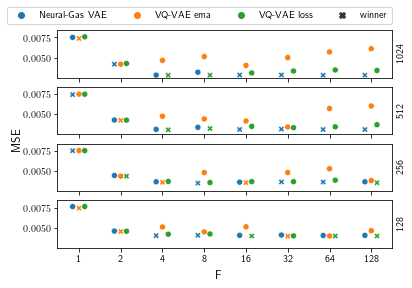

In [6]:
df = pd.read_csv("experiment_03.csv")
from matplotlib import scale

fig, axis = plt.subplots(nrows=4, sharex=True)

vs = sorted(df["codebook_size"].unique(), reverse=True)
df["quantization_name"] = df["quantization_name"].apply(
    lambda x: {
        "Lightning_VQ_VAE_codebook_loss": "VQ-VAE loss",
        "Lightning_VQ_VAE_ema": "VQ-VAE ema",
        "Lightning_GVQ_VAE_codebook_loss": "Neural-Gas VAE",
    }[x]
)

is_winner = (
    df.groupby(by=["in_features", "codebook_size"])["best/MSELoss"]
    .transform(lambda x: x == x.min())
    .apply(lambda x: "winner" if x else "")
    .rename("")
)
cs = sorted(set(df["in_features"]))
df["in_features"] = df[["in_features", "quantization_name"]].apply(
    lambda x: {
        "VQ-VAE loss": x[0] * 1.1,
        "VQ-VAE ema": x[0] * 1.0,
        "Neural-Gas VAE": x[0] * 0.9,
    }[x[1]],
    axis=1,
)


mi, ma = df["best/MSELoss"].min(), df["best/MSELoss"].max()


for k, (v, ax) in enumerate(zip(vs, axis)):
    dft = df[df["codebook_size"] == v]
    sns.scatterplot(
        x=dft["in_features"],
        y=dft["best/MSELoss"],
        hue=dft["quantization_name"].rename(""),
        style=is_winner,
        ax=ax,
        legend=(k == 0),
    )
    ax.set_ylim([0.9 * mi, 1.1 * ma])
    ax.set_xscale(scale.LogScale(ax, base=2))
    ax.set_xticks(cs)
    ax.set_xticklabels([int(n) for n in cs])
    ax.set_xlabel("")
    ax.set_ylabel(int(v))
    ax.yaxis.set_label_position("right")

    if k == 0:
        ax.legend(
            bbox_to_anchor=(-0.15, 1.5), loc="upper left", borderaxespad=0, ncol=4
        )

fig.supylabel("MSE")
fig.supxlabel("F")
plt.show()
#plt.savefig(path + "VS_CIFAR.pdf", bbox_inches="tight")
#plt.close()


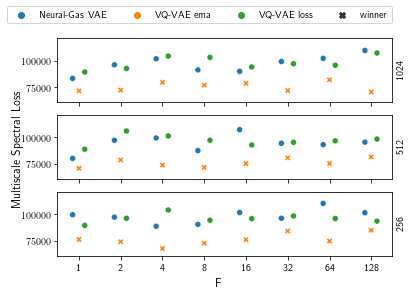

In [7]:
df = pd.read_csv("experiment_04.csv")
from matplotlib import scale

fig, axis = plt.subplots(nrows=3, sharex=True)

vs = sorted(df["codebook_size"].unique(), reverse=True)
df["quantization_name"] = df["quantization_name"].apply(
    lambda x: {
        "Lightning_VQ_VAE_codebook_loss": "VQ-VAE loss",
        "Lightning_VQ_VAE_ema": "VQ-VAE ema",
        "Lightning_GVQ_VAE_codebook_loss": "Neural-Gas VAE",
    }[x]
)

is_winner = (
    df.groupby(by=["in_features", "codebook_size"])["test/MultiscaleSpectralLossL1"]
    .transform(lambda x: x == x.min())
    .apply(lambda x: "winner" if x else "")
    .rename("")
)
cs = sorted(set(df["in_features"]))
df["in_features"] = df[["in_features", "quantization_name"]].apply(
    lambda x: {
        "VQ-VAE loss": x[0] * 1.1,
        "VQ-VAE ema": x[0] * 1.0,
        "Neural-Gas VAE": x[0] * 0.9,
    }[x[1]],
    axis=1,
)


mi, ma = (
    df["test/MultiscaleSpectralLossL1"].min(),
    df["test/MultiscaleSpectralLossL1"].max(),
)


for k, (v, ax) in enumerate(zip(vs, axis)):
    dft = df[df["codebook_size"] == v]
    sns.scatterplot(
        x=dft["in_features"],
        y=dft["test/MultiscaleSpectralLossL1"],
        hue=dft["quantization_name"].rename(""),
        ax=ax,
        legend=(k == 0),
        style=is_winner,
    )
    ax.set_ylim([0.9 * mi, 1.1 * ma])
    ax.set_xscale(scale.LogScale(ax, base=2))
    ax.set_xticks(cs)
    ax.set_xticklabels([int(n) for n in cs])
    ax.set_xlabel("")
    ax.set_ylabel(int(v))
    ax.yaxis.set_label_position("right")

    if k == 0:
        ax.legend(
            bbox_to_anchor=(-0.15, 1.5), loc="upper left", borderaxespad=0, ncol=4
        )

fig.supylabel("Multiscale Spectral Loss")
fig.supxlabel("F")
plt.savefig(path + "VS_Speech.pdf", bbox_inches="tight")
plt.show()


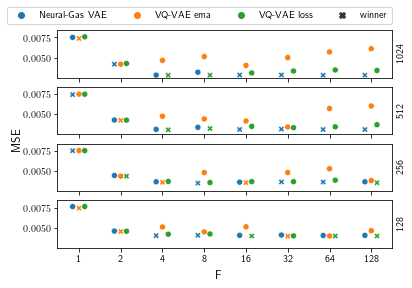

In [8]:
df = pd.read_csv("experiment_03.csv")
from matplotlib import scale

fig, axis = plt.subplots(nrows=4, sharex=True)

vs = sorted(df["codebook_size"].unique(), reverse=True)
df["quantization_name"] = df["quantization_name"].apply(
    lambda x: {
        "Lightning_VQ_VAE_codebook_loss": "VQ-VAE loss",
        "Lightning_VQ_VAE_ema": "VQ-VAE ema",
        "Lightning_GVQ_VAE_codebook_loss": "Neural-Gas VAE",
    }[x]
)

is_winner = (
    df.groupby(by=["in_features", "codebook_size"])["best/MSELoss"]
    .transform(lambda x: x == x.min())
    .apply(lambda x: "winner" if x else "")
    .rename("")
)
cs = sorted(set(df["in_features"]))
df["in_features"] = df[["in_features", "quantization_name"]].apply(
    lambda x: {
        "VQ-VAE loss": x[0] * 1.1,
        "VQ-VAE ema": x[0] * 1.0,
        "Neural-Gas VAE": x[0] * 0.9,
    }[x[1]],
    axis=1,
)


mi, ma = df["best/MSELoss"].min(), df["best/MSELoss"].max()


for k, (v, ax) in enumerate(zip(vs, axis)):
    dft = df[df["codebook_size"] == v]
    sns.scatterplot(
        x=dft["in_features"],
        y=dft["best/MSELoss"],
        hue=dft["quantization_name"].rename(""),
        style=is_winner,
        ax=ax,
        legend=(k == 0),
    )
    ax.set_ylim([0.9 * mi, 1.1 * ma])
    ax.set_xscale(scale.LogScale(ax, base=2))
    ax.set_xticks(cs)
    ax.set_xticklabels([int(n) for n in cs])
    ax.set_xlabel("")
    ax.set_ylabel(int(v))
    ax.yaxis.set_label_position("right")

    if k == 0:
        ax.legend(
            bbox_to_anchor=(-0.15, 1.5), loc="upper left", borderaxespad=0, ncol=4
        )

fig.supylabel("MSE")
fig.supxlabel("F")

plt.savefig(path + "VS_CIFAR.pdf", bbox_inches="tight")
plt.show()


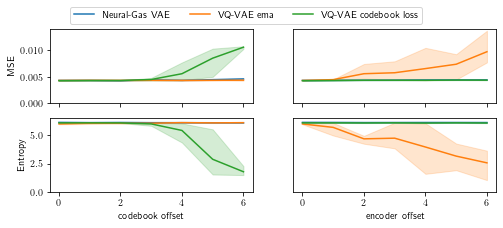

In [35]:

df = pd.read_csv('experiment_08.csv')

df['quantization_name'] = df['quantization_name'].apply(lambda x:
                                                         {         
                "Lightning_VQ_VAE_codebook_loss": "VQ-VAE codebook loss",
                "Lightning_VQ_VAE_ema": "VQ-VAE ema",
                "Lightning_GVQ_VAE_codebook_loss": "Neural-Gas VAE"}[x])

fig, axes = plt.subplots(2,2, sharex=True, figsize=(8,3))

dft = df[df['encoder offset'] == 0]

sns.lineplot(ax=axes[0][0], x=dft['codebook offset'].rename('codebook offset'), y=dft['best/MSELoss'].rename('MSE'), hue=dft['quantization_name'].rename(''))
sns.lineplot(ax=axes[1][0], x=dft['codebook offset'].rename('codebook offset'), y=dft['best/codebook_entropy'].rename('Entropy'), hue=dft['quantization_name'].rename(''), legend=False)


dft = df[df['codebook offset'] == 0]


sns.lineplot(ax=axes[0][1], x=dft['encoder offset'].rename('encoder offset'), y=dft['best/MSELoss'].rename('MSE'), hue=dft['quantization_name'].rename(''), legend=False) 
sns.lineplot(ax=axes[1][1], x=dft['encoder offset'].rename('encoder offset'), y=dft['best/codebook_entropy'].rename('Entropy'), hue=dft['quantization_name'].rename(''), legend=False
           )


axes[0][0].legend(
            bbox_to_anchor=( 0.1, 1.3), loc="upper left", borderaxespad=0, ncol=4
        )

axes[0][0].set_ylim([0,0.014])
axes[0][1].set_ylim([0,0.014])
axes[0][1].set_ylabel('')
axes[0][1].set_yticks([])

axes[1][0].set_ylim([0,6.5])
axes[1][1].set_ylim([0,6.5])
axes[1][1].set_ylabel('')
axes[1][1].set_yticks([])


plt.savefig(path + "index_collapse.pdf", bbox_inches="tight")
plt.show()
